<a href="https://colab.research.google.com/github/ihsanalhasan82/Analyze-AB-Test-Results/blob/master/RNN_Model_for_Apple_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.metrics import mean_absolute_error

# import the relevant Keras modules
from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout  


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Apple.csv to Apple.csv


In [85]:
import io
apple = pd.read_csv('Apple.csv')
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-12-26,0.265625,0.267857,0.254464,0.262277,0.226253,216815200
1,2000-12-27,0.256138,0.264509,0.253348,0.264509,0.228179,325466400
2,2000-12-28,0.256696,0.266741,0.255580,0.264509,0.228179,305177600
3,2000-12-29,0.262277,0.267857,0.258929,0.265625,0.229142,630336000
4,2001-01-02,0.265625,0.272321,0.260045,0.265625,0.229142,452312000


In [86]:
# We assign column "Close" to variable "Data"
apple = apple.loc[:,["Close"]].values


train = apple[:len(apple)-50] 
test = apple[len(train):] # last 50 data will be our test data

# reshape
train=train.reshape(train.shape[0],1)

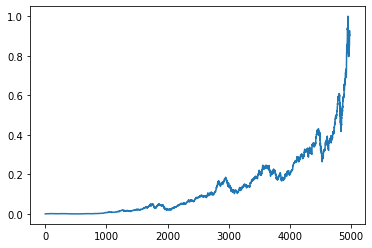

In [70]:
# feature scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train

plt.plot(train_scaled)
plt.show()

In [71]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

In [72]:
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 
# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation. 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
155/155 [==============================] - 9s 40ms/step - loss: 0.2414
Epoch 2/10
155/155 [==============================] - 6s 41ms/step - loss: 0.0385
Epoch 3/10
155/155 [==============================] - 6s 41ms/step - loss: 0.0168
Epoch 4/10
155/155 [==============================] - 6s 41ms/step - loss: 0.0095
Epoch 5/10
155/155 [==============================] - 6s 41ms/step - loss: 0.0057
Epoch 6/10
155/155 [==============================] - 6s 41ms/step - loss: 0.0044
Epoch 7/10
155/155 [==============================] - 6s 41ms/step - loss: 0.0036
Epoch 8/10
155/155 [==============================] - 6s 41ms/step - loss: 0.0028
Epoch 9/10
155/155 [==============================] - 6s 40ms/step - loss: 0.0023
Epoch 10/10
155/155 [==============================] - 6s 40ms/step - loss: 0.0020


In [73]:
inputs = apple[len(apple) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scal

In [74]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])  
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [75]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

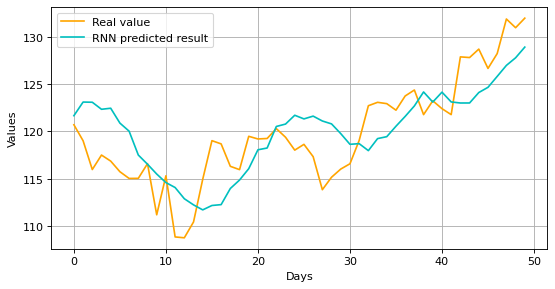

In [76]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [77]:
from sklearn.metrics import mean_absolute_error

#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(test, predicted_data, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  3.2242302048828124
